## Creating the Frailty Index
#### By Gavin Qu, July 10th 2024

### Data Extraction
- Reads each wave's data from its respective file
- Extracts only the specified variables for each wave
- Adds a 'wave' column to identify the source wave for each row
- Combines all waves' data into a single DataFrame

In [1]:
import os
import pandas as pd

# Set directory
data_dir = '/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Base list of relevant variables (without wave prefix)
base_variables = [
    'pidp',
    'age_dv',
    'disdif1', 'disdif2', 'disdif3', 'disdif4', 'disdif5', 'disdif6', 'disdif7', 'disdif8',
    'disdif9', 'disdif10', 'disdif11',
    'hcond1', 'hcond2', 'hcond3', 'hcond4', 'hcond5', 'hcond6', 'hcond7', 'hcond8', 
    'hcond9', 'hcond10', 'hcond11', 'hcond12', 'hcond13', 'hcond14', 'hcond15', 'hcond16', 
    'hcondn1', 'hcondn2', 'hcondn3', 'hcondn4', 'hcondn5', 'hcondn6', 'hcondn7', 'hcondn8', 
    'hcondn9', 'hcondn10', 'hcondn11', 'hcondn12', 'hcondn13', 'hcondn14', 'hcondn15', 'hcondn16', 
    'hcondever1', 'hcondever2', 'hcondever3', 'hcondever4', 'hcondever5', 'hcondever6', 'hcondever7', 'hcondever8', 
    'hcondever9', 'hcondever10', 'hcondever11', 'hcondever12', 'hcondever13', 'hcondever14', 'hcondever15', 'hcondever16', 
    'hcondnew1', 'hcondnew2', 'hcondnew3', 'hcondnew4', 'hcondnew5', 'hcondnew6', 'hcondnew7', 'hcondnew8', 
    'hcondnew9', 'hcondnew10', 'hcondnew11', 'hcondnew12', 'hcondnew13', 'hcondnew14', 'hcondnew15', 'hcondnew16', 
]

# Initialize an empty list to store DataFrames variables 
df_list = []

# Process each wave
for wave in 'abcdefghijklm':
    file_path = os.path.join(data_dir, f'{wave}_indresp.dta')
    
    # Read the .dta file to get available columns
    with pd.read_stata(file_path, iterator=True) as stata_file:
        available_columns = stata_file.variable_labels().keys()
    
    # Create a list of variables that exist in this wave's data
    wave_vars = ['pidp'] + [f'{wave}_{var}' for var in base_variables[1:] if f'{wave}_{var}' in available_columns]
    
    # Read only the available columns
    df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)
    df_wave['wave'] = wave
    
    # Remove wave prefix from column names
    df_wave.columns = ['pidp' if col == 'pidp' else col[2:] if col.startswith(f'{wave}_') else col for col in df_wave.columns]
    
    df_list.append(df_wave)
    print(f"Processed wave {wave}, extracted {len(wave_vars)} variables")

# Combine all DataFrames
df_combined = pd.concat(df_list, ignore_index=True)

# Save to CSV
output_path = os.path.join(output_dir, 'ukhls_extracted.csv')
df_combined.to_csv(output_path, index=False)

print(f"Extracted data saved to {output_path}")
print(f"Total rows: {len(df_combined)}")
print(f"Total columns: {len(df_combined.columns)}")

Processed wave a, extracted 29 variables
Processed wave b, extracted 29 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/1875580472.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/1875580472.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave c, extracted 45 variables
Processed wave d, extracted 45 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/1875580472.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/1875580472.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave e, extracted 45 variables
Processed wave f, extracted 45 variables
Processed wave g, extracted 45 variables
Processed wave h, extracted 45 variables
Processed wave i, extracted 45 variables
Processed wave j, extracted 43 variables
Processed wave k, extracted 43 variables
Processed wave l, extracted 43 variables
Processed wave m, extracted 43 variables
Extracted data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_extracted.csv
Total rows: 533476
Total columns: 76


### Sort dataframe by pidp and wave
**The resulting csv file from the previous step does not organize the 'pidp' correctly and next to each other, so the following script with reorganize it into a easier to work with long panel with the same 'pidp' all below each other.**

In [2]:
import pandas as pd
import os

# Set input and output directories
input_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Read the input CSV file
input_file = os.path.join(input_dir, 'ukhls_extracted.csv')
df = pd.read_csv(input_file)

# Sort the dataframe by 'pidp' and 'wave'
df_sorted = df.sort_values(['pidp', 'wave'])

# Reset the index
df_sorted = df_sorted.reset_index(drop=True)

# Save the sorted dataframe to a new CSV file
output_file = os.path.join(output_dir, 'ukhls_long_panel_format.csv')
df_sorted.to_csv(output_file, index=False)

print(f"Long panel format data saved to {output_file}")
print(f"Total rows: {len(df_sorted)}")
print(f"Total columns: {len(df_sorted.columns)}")

Long panel format data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv
Total rows: 533476
Total columns: 76


**note:** hcondever9 does not exist - "Hyperthyroidism or an over-active thyroid"

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/1794667354.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts = df.groupby('wave').apply(lambda x: pd.Series({


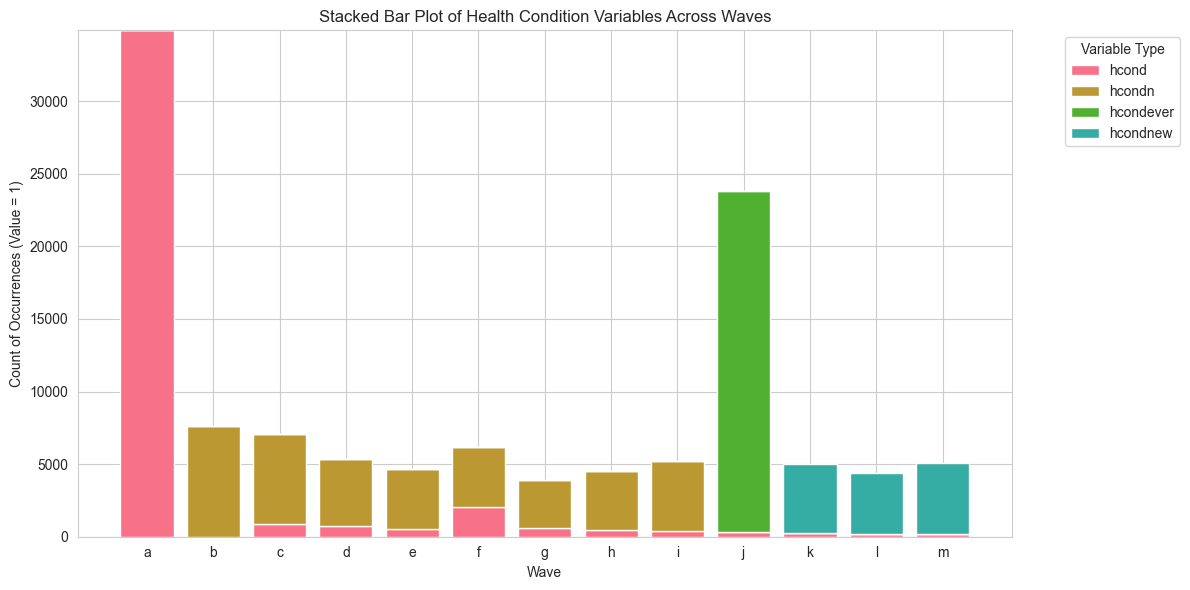

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv')

hcond_vars = [f'hcond{i}' for i in range(1, 17)]
hcondn_vars = [f'hcondn{i}' for i in range(1, 17)]
hcondever_vars = [f'hcondever{i}' for i in range(1, 17) if i != 9]
hcondnew_vars = [f'hcondnew{i}' for i in range(1, 17) if i != 9]

# Function to count occurrences where value is 1
def count_ones(group, variables):
    return group[variables].eq(1).sum().sum()

counts = df.groupby('wave').apply(lambda x: pd.Series({
    'hcond': count_ones(x, hcond_vars),
    'hcondn': count_ones(x, hcondn_vars),
    'hcondever': count_ones(x, hcondever_vars),
    'hcondnew': count_ones(x, hcondnew_vars)
})).reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")

bottom = np.zeros(13)
for column in ['hcond', 'hcondn', 'hcondever', 'hcondnew']:
    plt.bar(counts['wave'], counts[column], bottom=bottom, label=column)
    bottom += counts[column]

plt.title('Stacked Bar Plot of Health Condition Variables Across Waves')
plt.xlabel('Wave')
plt.ylabel('Count of Occurrences (Value = 1)')
plt.legend(title='Variable Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Data Wrangling and New Variable Construction
#### Creating the 'healthcond' variable

1. For wave 'a', it only considers hcond.
2. It skips wave 'b' for hcond.
3. For waves 'c' through 'i' (waves 2-9), it considers both hcond (for new participants) and hcondn (for existing participants).
4. For wave 'j' (wave 10), it uses hcond and hcondever.
5. For waves 'k', 'l', and 'm' (waves 11-13), it uses hcond and hcondnew.
6. It converts all negative values to NaN.
7. After processing each wave, it forward-fills the health condition status for each individual.

In [5]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv')

# Convert all negative values to NaN
df = df.apply(lambda x: x.where(x >= 0, np.nan) if x.dtype.kind in 'biufc' else x)

# Define waves
waves = 'abcdefghijklm'

def create_health_condition_columns(df):
    for i in range(1, 17):
        condition_col = f'healthcond{i}'
        df[condition_col] = np.nan
        
        hcond_col = f'hcond{i}'
        hcondn_col = f'hcondn{i}'
        hcondever_col = f'hcondever{i}'
        hcondnew_col = f'hcondnew{i}'
        
        # Initialize the condition column
        df[condition_col] = 0
        
        for wave in waves:
            wave_mask = df['wave'] == wave
            
            if wave == 'a':
                if hcond_col in df.columns:
                    df.loc[wave_mask & (df[hcond_col] == 1), condition_col] = 1
                    df.loc[wave_mask & (df[hcond_col].isna()), condition_col] = np.nan
            elif wave == 'b':  # Wave 2
                if hcondn_col in df.columns:
                    df.loc[wave_mask & (df[hcondn_col] == 1), condition_col] = 1
                    df.loc[wave_mask & (df[hcondn_col].isna()) & (df[condition_col] != 1), condition_col] = np.nan
            elif wave in 'cdefghi':  # Waves 3-9
                if hcond_col in df.columns and hcondn_col in df.columns:
                    df.loc[wave_mask & ((df[hcond_col] == 1) | (df[hcondn_col] == 1)), condition_col] = 1
                    df.loc[wave_mask & (df[hcondn_col].isna()) & (df[hcond_col].isna()) & (df[condition_col] != 1), condition_col] = np.nan
            elif wave == 'j':  # Wave 10
                if hcond_col in df.columns and hcondever_col in df.columns:
                    df.loc[wave_mask & ((df[hcond_col] == 1) | (df[hcondever_col] == 1)), condition_col] = 1
                    df.loc[wave_mask & (df[hcondever_col].isna()) & (df[hcond_col].isna()) & (df[condition_col] != 1), condition_col] = np.nan
            elif wave in 'klm':  # Waves 11-13
                if hcond_col in df.columns and hcondnew_col in df.columns:
                    df.loc[wave_mask & ((df[hcond_col] == 1) | (df[hcondnew_col] == 1)), condition_col] = 1
                    df.loc[wave_mask & (df[hcondnew_col].isna()) & (df[hcond_col].isna()) & (df[condition_col] != 1), condition_col] = np.nan
        
        # Forward fill the condition
        df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.fillna(method='ffill'))
        
        # Ensure that 1s are not overwritten
        df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.where(x != 1, 1))
        
        # Set to NaN if all previous values were NaN
        df[condition_col] = df.groupby('pidp')[condition_col].transform(
            lambda x: x.where(x.notna().cumsum() > 0, np.nan)
        )
    
    return df

# Apply the function to create health condition columns
df = create_health_condition_columns(df)

# Sort the dataframe by pidp and wave
df = df.sort_values(['pidp', 'wave'])

# Save the updated dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv'
df.to_csv(output_path, index=False)

print(f"Updated dataset saved to {output_path}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/3273271964.py:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.fillna(method='ffill'))
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/3273271964.py:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.fillna(method='ffill'))
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/3273271964.py:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.fillna(method='ffill'))
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn

Updated dataset saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv
Total rows: 533476
Total columns: 92


#### I noticed that healthcond is not filled correctly, so the following code forces a 1 onto following waves once a 1 has been recorded in healthcond column

In [9]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv')

# Sort the dataframe by pidp and wave to ensure chronological order
df = df.sort_values(['pidp', 'wave'])

# Define the waves and health condition columns
waves = 'abcdefghijklm'
wave_order = {wave: index for index, wave in enumerate(waves)}
health_cond_cols = [f'healthcond{i}' for i in range(1, 17)]

def fill_health_conditions(group):
    for col in health_cond_cols:
        # Find the first occurrence of 1
        first_one = group[group[col] == 1]['wave'].min()
        if pd.notna(first_one):
            # Fill all subsequent waves with 1
            group.loc[group['wave'].map(wave_order) >= wave_order[first_one], col] = 1
    return group

# Apply the function to each pidp group
df = df.groupby('pidp').apply(fill_health_conditions).reset_index(drop=True)

# Save the updated dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel_filled.csv'
df.to_csv(output_path, index=False)

print(f"Updated dataset saved to {output_path}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

# Verify the changes
for col in health_cond_cols:
    ones_before = df[col].eq(1).sum()
    zeros_before = df[col].eq(0).sum()
    nans_before = df[col].isna().sum()
    print(f"{col}: 1s: {ones_before}, 0s: {zeros_before}, NaNs: {nans_before}")

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/499851913.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('pidp').apply(fill_health_conditions).reset_index(drop=True)


Updated dataset saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel_filled.csv
Total rows: 533476
Total columns: 92
healthcond1: 1s: 67349, 0s: 443318, NaNs: 22809
healthcond2: 1s: 82987, 0s: 427680, NaNs: 22809
healthcond3: 1s: 3841, 0s: 506826, NaNs: 22809
healthcond4: 1s: 11233, 0s: 499434, NaNs: 22809
healthcond5: 1s: 13856, 0s: 496811, NaNs: 22809
healthcond6: 1s: 12429, 0s: 498238, NaNs: 22809
healthcond7: 1s: 10312, 0s: 500355, NaNs: 22809
healthcond8: 1s: 4186, 0s: 506481, NaNs: 22809
healthcond9: 1s: 6133, 0s: 505149, NaNs: 22194
healthcond10: 1s: 19378, 0s: 491289, NaNs: 22809
healthcond11: 1s: 9672, 0s: 500995, NaNs: 22809
healthcond12: 1s: 10158, 0s: 500509, NaNs: 22809
healthcond13: 1s: 26378, 0s: 484289, NaNs: 22809
healthcond14: 1s: 36020, 0s: 474647, NaNs: 22809
healthcond15: 1s: 5674, 0s: 504993, NaNs: 22809
healthcond16: 1s: 100244, 0s: 410423, NaNs: 22809


#### The following code reorganizes the death dataset into a long panel format

In [10]:
import pandas as pd
import numpy as np

# Load the dataset from the new CSV file
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/extracted_dcsedw_dv_with_deaths.csv')

# Define waves, starting from 'b'
waves = 'bcdefghijklm'

# Remove rows that are all zero from 'b_death' to 'm_death'
death_columns = [f'{wave}_death' for wave in waves]
df = df[~(df[death_columns] == 0).all(axis=1)]

# Melt the dataframe to long format
df_long = pd.melt(df, id_vars=['pidp'], value_vars=death_columns, 
                  var_name='wave', value_name='death')

# Extract wave letter from 'wave' column
df_long['wave'] = df_long['wave'].str[0]

# Remove rows where death is 0
df_long = df_long[df_long['death'] != 0]

# Sort by pidp and wave
df_long = df_long.sort_values(['pidp', 'wave'])

# Reset index
df_long = df_long.reset_index(drop=True)

# Save the long format death dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv'
df_long.to_csv(output_path, index=False)

print(f"Long panel death data saved to {output_path}")
print(f"Total rows: {len(df_long)}")
print(f"Unique pidps: {df_long['pidp'].nunique()}")
print("\nSample of the data:")
print(df_long.head(10))

# Additional check for multiple death records
multiple_deaths = df_long.groupby('pidp').size().sort_values(ascending=False)
if (multiple_deaths > 1).any():
    print("\nWarning: Some pidps have multiple death records:")
    print(multiple_deaths[multiple_deaths > 1].head())
else:
    print("\nNo pidps with multiple death records found.")

# Distribution of deaths by wave
print("\nDistribution of deaths by wave:")
print(df_long['wave'].value_counts().sort_index())

Long panel death data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv
Total rows: 4444
Unique pidps: 4444

Sample of the data:
       pidp wave  death
0   3490445    l      1
1  68006807    j      1
2  68014287    l      1
3  68020407    l      1
4  68025847    j      1
5  68034007    c      1
6  68044891    e      1
7  68048287    j      1
8  68048291    c      1
9  68060525    m      1

No pidps with multiple death records found.

Distribution of deaths by wave:
wave
b    276
c    381
d    457
e    347
f    351
g    433
h    432
i    378
j    366
k    346
l    337
m    340
Name: count, dtype: int64


### Merging death long panel with healthcond
it should be noted that once a person dies, the main survey stops recording that person so if a person dies in wave c, there will be no wave c and forward data recorded in the main survey

In [45]:
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel_filled.csv')
death_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv')

output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/health_conditions_with_death_long_panel.csv'

# Create a new dataframe with the same columns as df, but with data from death_df
new_rows = pd.DataFrame(columns=df.columns)
new_rows['pidp'] = death_df['pidp']
new_rows['wave'] = death_df['wave']
new_rows['death'] = 1  # Set death to 1 for these rows

# Fill all other columns with 0
for col in new_rows.columns:
    if col not in ['pidp', 'wave', 'death']:
        new_rows[col] = 0

# Concatenate the original dataframe with the new rows
merged_df = pd.concat([df, new_rows], ignore_index=True)

# Sort the dataframe by pidp and wave
merged_df = merged_df.sort_values(['pidp', 'wave'])

# Fill NaN values in the death column with 0
merged_df['death'] = merged_df['death'].fillna(0).astype(int)

# Save the result
merged_df.to_csv(output_path, index=False)

In [46]:
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/health_conditions_with_death_long_panel.csv')

death_count = df['death'].eq(1).sum()
print(f"Number of deaths: {death_count}")

Number of deaths: 4444


#### Extrapolating the missing age data after merging

In [48]:
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/health_conditions_with_death_long_panel.csv')

# Create a mapping for waves
wave_map = {letter: number for number, letter in enumerate('abcdefghijklm', start=1)}

# Convert wave to numeric using the mapping
df['wave_num'] = df['wave'].map(wave_map)

# Convert 'age_dv' to numeric, coercing errors to NaN
df['age_dv'] = pd.to_numeric(df['age_dv'], errors='coerce')

# Sort the dataframe by pidp and wave_num
df = df.sort_values(['pidp', 'wave_num'])

# Function to fill age for a group
def fill_age(group):
    # Find the first non-null age
    first_valid = group['age_dv'].first_valid_index()
    if first_valid is not None:
        start_age = group.loc[first_valid, 'age_dv']
        start_wave_num = group.loc[first_valid, 'wave_num']
        
        # Calculate age difference based on wave difference
        group['age_dv'] = start_age + (group['wave_num'] - start_wave_num)
    
    return group

# Apply the function to each pidp group
df = df.groupby('pidp', group_keys=False).apply(fill_age)

# Round ages to nearest integer
df['age_dv'] = df['age_dv'].round().astype('Int64')

# Remove the temporary wave_num column
df = df.drop('wave_num', axis=1)

# Save the updated dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/health_conditions_with_death_long_panel_age_filled.csv'
df.to_csv(output_path, index=False)

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/662855786.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('pidp', group_keys=False).apply(fill_age)


## Construction of the Frailty Index

We also assigned a frailty of 1 if that person has died, using a previously extracted dataframe with death and wave data. 

The Frailty_Calculate Function does the following: 
- Checks if all health conditions are NaN across all waves for a pidp, if so, it sets the frailty to NaN for all waves of that pidp, otherwise, it calculates the frailty for each wave, treating NaN as 0.
- We apply this function to each pidp group:
We're calculating frailty wave by wave for each individual.
If an individual has no health data across all waves, their frailty is set to NaN for all waves.
For individuals with at least some health data, we calculate frailty for each wave, treating NaN values as 0 in the calculation.

In [49]:
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/health_conditions_with_death_long_panel_age_filled.csv')

output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/frailty_long_panel.csv'

# Define waves and create wave_order
waves = 'abcdefghijklm'
wave_order = {wave: i for i, wave in enumerate(waves)}
df['wave_order'] = df['wave'].map(wave_order)

# Calculate frailty wave by wave
health_cols = [f'healthcond{i}' for i in range(1, 17)] + [f'disdif{i}' for i in range(1, 12)]

def calculate_frailty(group):
    # Check if all health conditions are NaN across all waves for this pidp
    if group[health_cols].isna().all().all():
        group['frailty'] = np.nan
    else:
        # Calculate frailty for each wave, treating NaN as 0
        group['frailty'] = group[health_cols].fillna(0).sum(axis=1) / 27
    return group

# Apply the frailty calculation to each pidp group
df = df.groupby('pidp').apply(calculate_frailty).reset_index(drop=True)

# Sort the dataframe
df = df.sort_values(['pidp', 'wave_order'])

# Forward fill the death indicator within each pidp group
df['death'] = df.groupby('pidp')['death'].fillna(method='ffill')

# Set frailty to 1 for individuals from their death wave onwards
df.loc[df['death'] == 1, 'frailty'] = 1.0

# Drop temporary column
df = df.drop('wave_order', axis=1)

# Save the result
df.to_csv(output_path, index=False)

print(f"\nData with frailty measures saved to {output_path}")

# Print summary statistics
print("\nFrailty Summary:")
print(df['frailty'].describe())

print("\nFrailty distribution:")
print(df['frailty'].value_counts(normalize=True).sort_index())

# Check for any rows where death is not 0 or 1
invalid_death = df[~df['death'].isin([0, 1])]
if not invalid_death.empty:
    print(f"\nNumber of rows with invalid death values: {len(invalid_death)}")
    print("Sample of invalid death rows:")
    print(invalid_death.head())
else:
    print("\nAll death values are valid (0 or 1).")

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/2636215621.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('pidp').apply(calculate_frailty).reset_index(drop=True)
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/2636215621.py:29: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['death'] = df.groupby('pidp')['death'].fillna(method='ffill')
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_35187/2636215621.py:29: FutureWarning: Series.fillna with 'method


Data with frailty measures saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/frailty_long_panel.csv

Frailty Summary:
count    529303.000000
mean          0.057325
std           0.116342
min           0.000000
25%           0.000000
50%           0.037037
75%           0.074074
max           1.000000
Name: frailty, dtype: float64

Frailty distribution:
frailty
0.000000    0.490313
0.037037    0.222476
0.074074    0.103357
0.111111    0.057003
0.148148    0.035875
0.185185    0.025245
0.222222    0.018269
0.259259    0.013027
0.296296    0.009108
0.333333    0.006291
0.370370    0.004172
0.407407    0.002668
0.444444    0.001680
0.481481    0.001037
0.518519    0.000521
0.555556    0.000325
0.592593    0.000134
0.629630    0.000057
0.666667    0.000025
0.703704    0.000017
0.740741    0.000002
0.777778    0.000004
1.000000    0.008396
Name: proportion, dtype: float64

All death values are valid (0 or 1).


### Plot of Frailty from age 20 and above
We want a smoothed line of best fit rather than a percentile representation. We can use a **LOWESS** (Locally Weighted Scatterplot Smoothing) approach to achieve this.

In [52]:
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/frailty_long_panel.csv')

In [54]:
df.head()

,pidp,age_dv,disdif1,disdif2,disdif3,disdif4,disdif5,disdif6,disdif7,disdif8,...,healthcond9,healthcond10,healthcond11,healthcond12,healthcond13,healthcond14,healthcond15,healthcond16,death,frailty
0,22445,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.037037
1,22445,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.037037
2,22445,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.037037
3,22445,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.037037
4,22445,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.037037


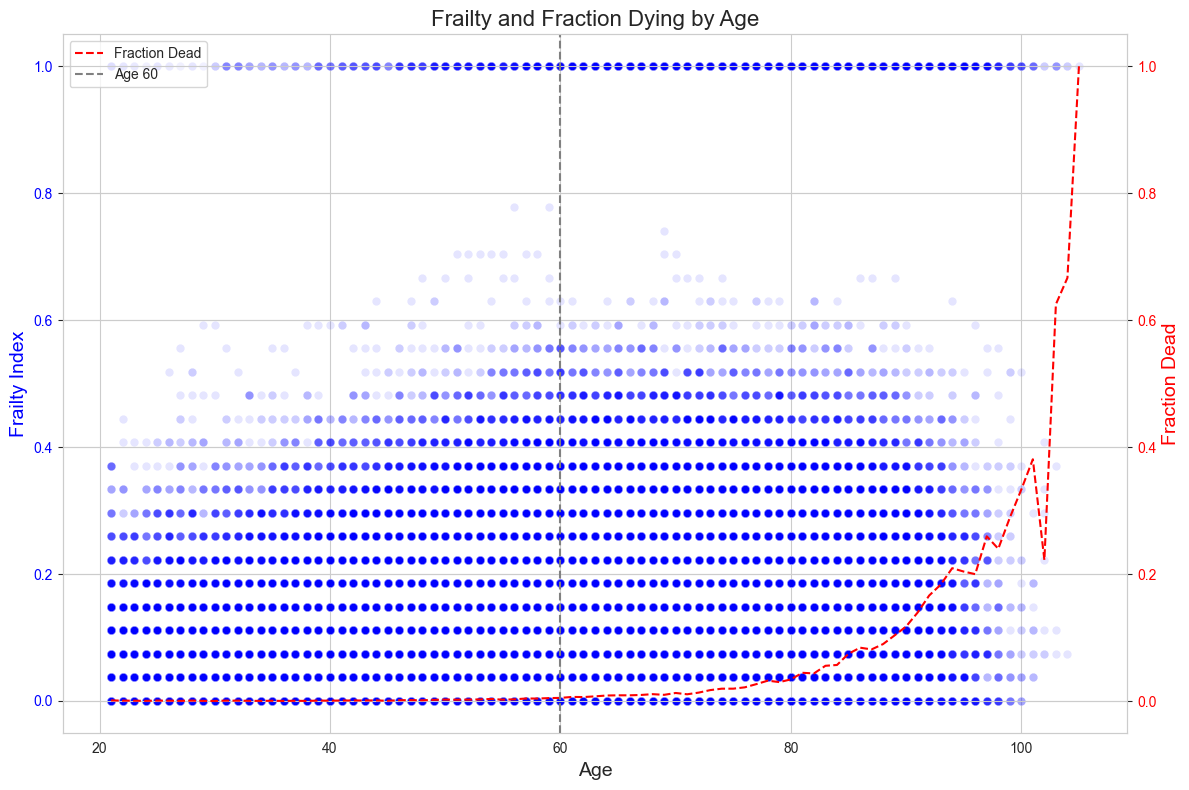

              age_dv        frailty
count  489471.000000  489471.000000
mean       50.981478       0.060537
std        17.326131       0.117902
min        21.000000       0.000000
25%        37.000000       0.000000
50%        50.000000       0.037037
75%        64.000000       0.074074
max       105.000000       1.000000

Number of deaths (frailty == 1): 4180


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_filtered is your filtered dataframe
df_filtered = df[(df['age_dv'] > 20) & (~np.isnan(df['frailty']))]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot frailty scatter
sns.scatterplot(x='age_dv', y='frailty', data=df_filtered, alpha=0.1, ax=ax1, color='blue')

ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Frailty Index', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for fraction dead
ax2 = ax1.twinx()

# Calculate fraction dead (frailty == 1) by age
fraction_dead = df_filtered.groupby('age_dv')['frailty'].apply(lambda x: (x == 1).mean())

# Plot fraction dead
ax2.plot(fraction_dead.index, fraction_dead.values, color='red', linestyle='--', label='Fraction Dead')
ax2.set_ylabel('Fraction Dead', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a vertical line at age 60
plt.axvline(x=60, color='gray', linestyle='--', label='Age 60')

plt.title('Frailty and Fraction Dying by Age', fontsize=16)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Print some summary statistics
print(df_filtered[['age_dv', 'frailty']].describe())

# Print the number of deaths (frailty == 1)
num_deaths = df_filtered['frailty'].eq(1).sum()
print(f"\nNumber of deaths (frailty == 1): {num_deaths}")

#### Now, let's refind this using a binned scatter plot